# ゼロから作るDeep Learning

## 3章 ニューラルネットワーク

### 3.4 3層ニューラルネットワークの実装

#### 3.4.1 記号の確認

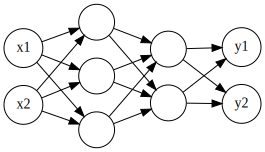

In [14]:
# ３層ニューラルネットワーク
from graphviz import Digraph

dg = Digraph(format='png')
dg.attr('node', shape='circle')
dg.attr('graph', rankdir='LR')

#dg.node('x1')
#dg.node('x2')
dg.node('11', label=' ')
dg.node('12', label=' ')
dg.node('13', label=' ')
dg.node('21', label=' ')
dg.node('22', label=' ')
dg.edge('x1', '11')
dg.edge('x1', '12')
dg.edge('x1', '13')
dg.edge('x2', '11')
dg.edge('x2', '12')
dg.edge('x2', '13')
dg.edge('11', '21')
dg.edge('12', '21')
dg.edge('13', '21')
dg.edge('11', '22')
dg.edge('12', '22')
dg.edge('13', '22')
dg.edge('21', 'y1')
dg.edge('22', 'y1')
dg.edge('21', 'y2')
dg.edge('22', 'y2')

dg


#### 3.4.2 各層における信号伝達の実装

$$
a_1^{(1)} = w_{11}^{(1)}x_1^{(1)} + w_{12}^{(1)}x_2^{(1)} + b_1^{(1)}
$$

行列の積で表すと

$$
A^{(1)} = XW^{(1)} + B^{(1)}
$$

ただし
$$
\begin{align}
  A^{(1)} &= \begin{vmatrix}
  a_1^{(1)} & a_2^{(1)} & a_3^{(1)} \\
  \end{vmatrix} \\
  X &= \begin{vmatrix}
  x_1 & x_2
  \end{vmatrix} \\
  B^{(1)} &= 
    \begin{vmatrix}
      b_1^{(1)} & b_2^{(1)} & b_3^{(1)} \\
    \end{vmatrix} \\
  W^{(1)} &=
    \begin{vmatrix}
      w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
      w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)} \\
    \end{vmatrix} \\
\end{align}
$$

In [18]:
## 入力層から第1層の1番目のニューロンへの信号の伝達
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [21]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [24]:
## 第1層から第2層への信号の伝達
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.2, 0.1])
print(Z1.shape)
print(W2.shape)
print(B2.shape)
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.64934466 0.7528791 ]


In [26]:
## 第2層から出力層への信号の伝達
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3)
Y = identity_function(A3)
print(Y)
print(A3)
print(Z2)

[0.21551029 0.49595504]
[0.21551029 0.49595504]
[0.64934466 0.7528791 ]


#### 3.4.3 実装のまとめ

In [27]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def identity_function(x):
    return x

## 重みとバイアスの初期化
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.2, 0.1])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

## 入力信号が出力へ変換されるプロセスをまとめて定義
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31551029 0.69595504]
